## Modelo para testar a hipótese "Certos tipos de crime acontecem com mais frequência após o horário de expediente (depois das 17h)"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [2]:
path = os.path.abspath('../data/analise_crime_filtrado.csv')
df = pd.read_csv(path,comment='#', low_memory=False)

In [3]:
df.head(4)

,OCORRENCIA_CODIGO,NATUREZA1_DESCRICAO,NATUREZA,ATENDIMENTO_BAIRRO_NOME,REGIONAL_FATO_NOME,OCORRENCIA_ANO,OCORRENCIA_DATA,OCORRENCIA_HORA,OCORRENCIA_HORA_SEM_MINUTO,OCORRENCIA_MES,OCORRENCIA_DIA_SEMANA,OCORRENCIA_DATA_SEM_HORARIO,FERIADO,LATITUDE,LONGITUDE
0,5122.0,Roubo,ROUBO,XAXIM,BOQUEIRÃO,2009.0,2009-03-13 09:20:00.000,09:20:00,9,3.0,SEXTA,2009-03-13,0.0,-25.426683,-49.272357
1,5507.0,Atos obscenos/libidinosos,PUDOR,BAIRRO ALTO,BOA VISTA,2009.0,2009-03-19 12:05:00.000,12:05:00,12,3.0,QUINTA,2009-03-19,0.0,-25.412337,-49.205083
2,4899.0,Embriaguez,RISCO_VIDA,FAZENDINHA,PORTÃO,2009.0,2009-03-09 14:00:00.000,14:00:00,14,3.0,SEGUNDA,2009-03-09,0.0,NaN,NaN
3,5401.0,Furto,ROUBO,FAZENDINHA,PORTÃO,2009.0,2009-03-16 20:11:00.000,20:11:00,20,3.0,SEGUNDA,2009-03-16,0.0,NaN,NaN


In [4]:
nature_count = df.NATUREZA.value_counts()
nature_count

ROUBO           26839
AGRESSAO        15361
RISCO_VIDA       4382
CRIME_MULHER     3681
PUDOR            2805
SEQUESTRO         415
MORTES            141
ESTUPRO           108
EXPLORACAO         17
Name: NATUREZA, dtype: int64

## Equalizando a quantidade de crimes aleatoriamente

In [5]:
df_explor = df.loc[df.NATUREZA == "EXPLORACAO"]
df_explor.loc[df_explor.index.repeat(nature_count["ROUBO"] / nature_count["EXPLORACAO"])].count()

OCORRENCIA_CODIGO              26826
NATUREZA1_DESCRICAO            26826
NATUREZA                       26826
ATENDIMENTO_BAIRRO_NOME        26826
REGIONAL_FATO_NOME             26826
OCORRENCIA_ANO                 26826
OCORRENCIA_DATA                26826
OCORRENCIA_HORA                26826
OCORRENCIA_HORA_SEM_MINUTO     26826
OCORRENCIA_MES                 26826
OCORRENCIA_DIA_SEMANA          26826
OCORRENCIA_DATA_SEM_HORARIO    26826
FERIADO                        26826
LATITUDE                       26826
LONGITUDE                      26826
dtype: int64

In [6]:
from math import ceil
def replicate_data(df, nature):
    df_temp = df.loc[df.NATUREZA == nature]
    df_temp = df_temp.loc[df_temp.index.repeat(ceil(nature_count["ROUBO"] / nature_count[nature]))]
    return df_temp.sample(n=nature_count["ROUBO"])

In [26]:
df_qtd = df.loc[df.NATUREZA == "ROUBO"]
df_qtd = pd.concat([df_qtd, replicate_data(df, "EXPLORACAO")])
df_qtd = pd.concat([df_qtd, replicate_data(df, "ESTUPRO")])
df_qtd = pd.concat([df_qtd, replicate_data(df, "MORTES")])
df_qtd = pd.concat([df_qtd, replicate_data(df, "SEQUESTRO")])
df_qtd = pd.concat([df_qtd, replicate_data(df, "PUDOR")])
df_qtd = pd.concat([df_qtd, replicate_data(df, "CRIME_MULHER")])
df_qtd = pd.concat([df_qtd, replicate_data(df, "RISCO_VIDA")])
df_qtd = pd.concat([df_qtd, replicate_data(df, "AGRESSAO")])

In [27]:
df_qtd.NATUREZA.value_counts(normalize=True)

ROUBO           0.111111
EXPLORACAO      0.111111
ESTUPRO         0.111111
MORTES          0.111111
SEQUESTRO       0.111111
PUDOR           0.111111
CRIME_MULHER    0.111111
RISCO_VIDA      0.111111
AGRESSAO        0.111111
Name: NATUREZA, dtype: float64

In [28]:
list(df_qtd.columns)

['OCORRENCIA_CODIGO',
 'NATUREZA1_DESCRICAO',
 'NATUREZA',
 'ATENDIMENTO_BAIRRO_NOME',
 'REGIONAL_FATO_NOME',
 'OCORRENCIA_ANO',
 'OCORRENCIA_DATA',
 'OCORRENCIA_HORA',
 'OCORRENCIA_HORA_SEM_MINUTO',
 'OCORRENCIA_MES',
 'OCORRENCIA_DIA_SEMANA',
 'OCORRENCIA_DATA_SEM_HORARIO',
 'FERIADO',
 'LATITUDE',
 'LONGITUDE']

### Selecionando crimes como antes ou depois das 17h

In [29]:
df_qtd["HORA_DEPOIS_17"] = df_qtd["OCORRENCIA_HORA_SEM_MINUTO"] >= 17
df_qtd["HORA_DEPOIS_17"] = df_qtd["HORA_DEPOIS_17"].astype(float)
df_qtd.head(2)

,OCORRENCIA_CODIGO,NATUREZA1_DESCRICAO,NATUREZA,ATENDIMENTO_BAIRRO_NOME,REGIONAL_FATO_NOME,OCORRENCIA_ANO,OCORRENCIA_DATA,OCORRENCIA_HORA,OCORRENCIA_HORA_SEM_MINUTO,OCORRENCIA_MES,OCORRENCIA_DIA_SEMANA,OCORRENCIA_DATA_SEM_HORARIO,FERIADO,LATITUDE,LONGITUDE,HORA_DEPOIS_17
0,5122.0,Roubo,ROUBO,XAXIM,BOQUEIRÃO,2009.0,2009-03-13 09:20:00.000,09:20:00,9,3.0,SEXTA,2009-03-13,0.0,-25.426683,-49.272357,0.0
3,5401.0,Furto,ROUBO,FAZENDINHA,PORTÃO,2009.0,2009-03-16 20:11:00.000,20:11:00,20,3.0,SEGUNDA,2009-03-16,0.0,NaN,NaN,1.0


### Alterando labels de tipo de crime para número

In [30]:
categories = ['ROUBO', 'PUDOR', 'RISCO_VIDA', 'AGRESSAO', 'SEQUESTRO', 'ESTUPRO', 'CRIME_MULHER', 'MORTES', 'EXPLORACAO']
categories_labels = [0,1,2,3,4,5,6,7,8]

def get_index_category(occurence):
    return categories.index(occurence)
df_qtd['NATUREZA_LABEL'] = df_qtd['NATUREZA'].apply(get_index_category)
df_qtd['NATUREZA_LABEL'] = df_qtd['NATUREZA_LABEL'].astype(float)

In [31]:
df_qtd = df_qtd[['NATUREZA_LABEL', 'HORA_DEPOIS_17']]

In [112]:
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette

In [166]:
df_cluster = df_qtd.sample(1000)

In [161]:
from scipy.cluster.vq import whiten
df_cluster = pd.DataFrame(whiten(df_cluster.to_numpy())).describe()

In [168]:
c_dist = pdist(df_cluster)
c_link = linkage(df_cluster,  metric='euclidean', method='ward')

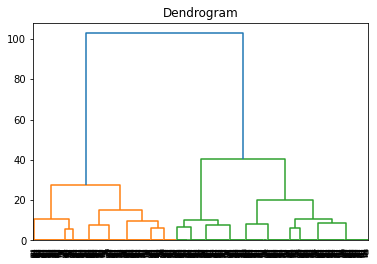

In [169]:
dendrogram(c_link)
plt.title('Dendrogram')
plt.show()

In [171]:
df_cluster['cluster_labels'] = fcluster(c_link, 3, criterion='maxclust')

In [173]:
df_cluster

,NATUREZA_LABEL,HORA_DEPOIS_17,cluster_labels
26263,5.0,1.0,1
42150,8.0,0.0,1
37092,0.0,1.0,3
52570,4.0,0.0,2
17769,6.0,0.0,1
...,...,...,...
19361,3.0,1.0,2
6345,6.0,1.0,1
50913,3.0,0.0,2
1708,1.0,0.0,3


KeyError: 0

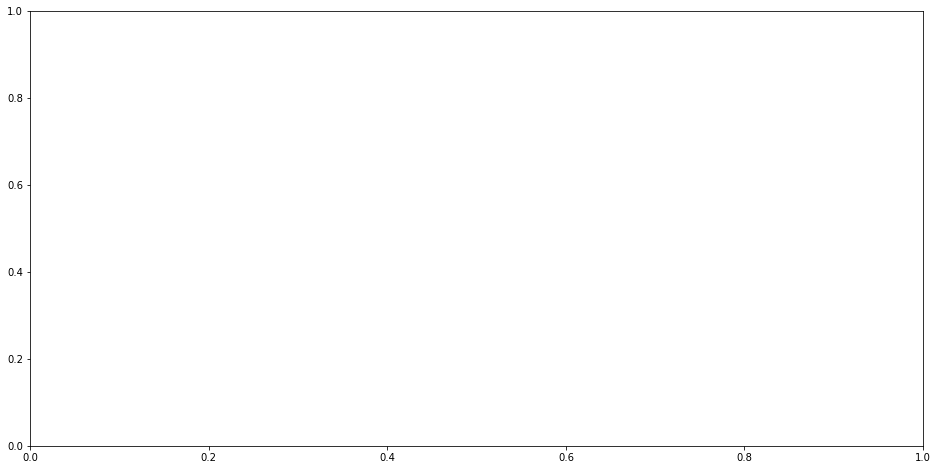

In [172]:
fig, axes = plt.subplots(1, figsize=(16,8))
axes.scatter(df_cluster[0], df_cluster[1], c=df_cluster['cluster_labels'], cmap=plt.cm.Set1)
axes.set_title('Hierarchical', fontsize=18)
